## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 3. Поиск аномалий во временных рядах.**


#### **3.1 Поиск диссонансов с помощью алгоритма HotSAX**

##### 3.1.1 Загрузка и подготовка данных

В данной будет использоваться временной ряд, состоящий из показаний акселерометра.
Анализируемый временной ряд, описывает две активности человека - бег и шаг.


In [ ]:
#!pip install scipy
#!pip install scikit-learn

In [ ]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from time import time
import pandas as pd

In [ ]:
#fixme: Путь
dataset_dir_path = Path('datasets')
data_path = dataset_dir_path/'walk_run.txt'
walk_run = np.loadtxt(data_path)[3000:4000]
data = walk_run
size_sub = 50

В середине временного ряда происходит смена активности (бег заменяет шаг). Нетипичным поведением, которое мы могли бы назвать диссонансами в данном ряде выступает небольшой участок между активностями, когда человек плавно увеличивает скорость шага до бега. В ходе данной работе наша задача выделить с помощью различных алгоритмов границы нашего диссонанса.

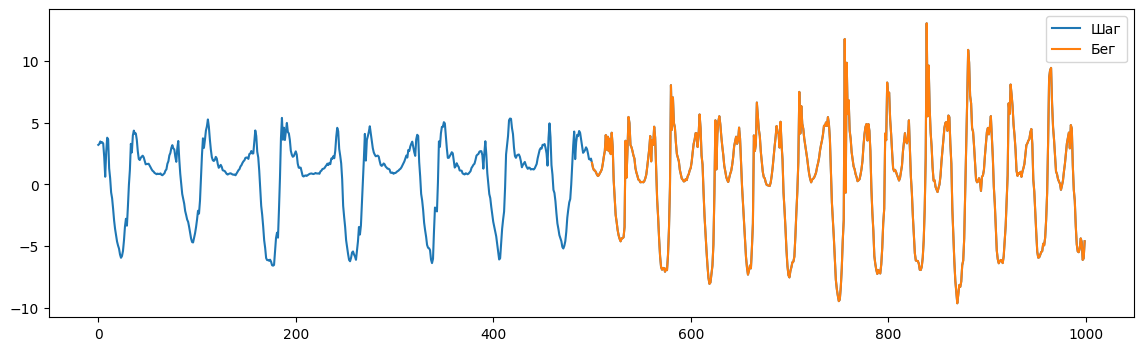

In [ ]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(data[:],label='Шаг')
plt.plot(np.arange(data.shape[0]//2,data.shape[0]),data[data.shape[0]//2:],label='Бег')
plt.legend()

In [ ]:
result={}
times={}

##### 3.1.2 Реализация полного перебора

Приводится пример кода для нахождения топ 5 диссонансов с помощью реализации полного беребора.
Вам необходимо добавить код для сбора времени обработки данных.

In [ ]:
from modules.saxpy.discord import find_discords_brute_force
start = time()
discords_brute_force= np.stack(find_discords_brute_force(data[:], 50, 5),dtype=float)
end = time()
times['brute_force'] = end - start
result['brute_force'] = discords_brute_force

##### 3.1.3 HotSAX

Используя [реализацию](https://github.com/seninp/saxpy/blob/master/saxpy/hotsax.py) найдите топ 5 диссонансов ряда.
Произведите замер времени работы.

In [ ]:
# INSERT YOUR CODE
from saxpy.hotsax import find_discords_hotsax

np.int = int
start_hotsax = time()
discords_hotsax = np.stack(find_discords_hotsax(data[:], win_size=50, num_discords=5),dtype=float)
end_hotsax = time()
times['hotsax'] = end_hotsax - start_hotsax
result['hotsax'] = discords_hotsax

##### 3.1.4 Визаулизация

Вам необходимо реализовать код позволяющий:
1. Вывести на одном графике ряд и его диссонансы
2. Столбчатую диаграмму времени работы обоих алгоритмов
   
Постройте графики для обоих алгоритмов и сравните полученные результаты.

Пример графика:

![first_graf](pics/fig_ex_1.png)

In [ ]:
# INSERT YOUR CODE

In [ ]:
def visualize(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data, label='Time Series', color='blue')

    # Выделение диссонансов на графике (Brute Force)
    for discord in result['brute_force']:
        start_idx = int(discord[0])  # Начало диссонанса
        end_idx = start_idx + 50  # Конец диссонанса
        plt.fill_betweenx(y=[data.min(), data.max()], x1=start_idx, x2=end_idx, color='red', alpha=0.5)

    plt.title('Time Series with Brute Force Discords')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(['Time Series', 'Brute Force Discords'])
    plt.grid(True)

    # --- График временного ряда и диссонансов для HotSAX ---
    plt.figure(figsize=(14, 7))
    plt.plot(data, label='Time Series', color='blue')

    # Выделение диссонансов на графике (HotSAX)
    for discord in result['hotsax']:
        start_idx = int(discord[0])  # Начало диссонанса
        end_idx = start_idx + 50  # Конец диссонанса
        plt.fill_betweenx(y=[data.min(), data.max()], x1=start_idx, x2=end_idx, color='green', alpha=0.5)

    plt.title('Time Series with HotSAX Discords')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(['Time Series', 'HotSAX Discords'])
    plt.grid(True)

    # --- Столбчатая диаграмма времени работы алгоритмов ---
    plt.figure(figsize=(7, 5))

    algorithms = ['Brute Force', 'HotSAX']
    times_values = [times['brute_force'], times['hotsax']]

    plt.bar(algorithms, times_values, color=['red', 'green'])
    plt.title('Execution Time Comparison')
    plt.ylabel('Time (seconds)')
    plt.grid(True)

    # Показать все графики
    plt.show()

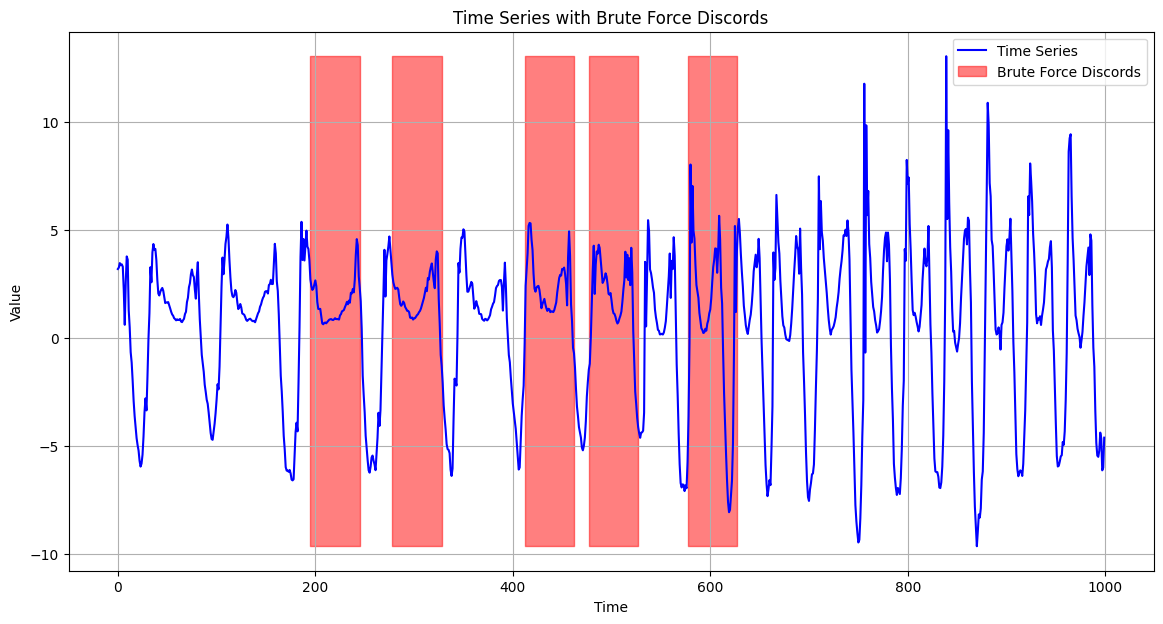

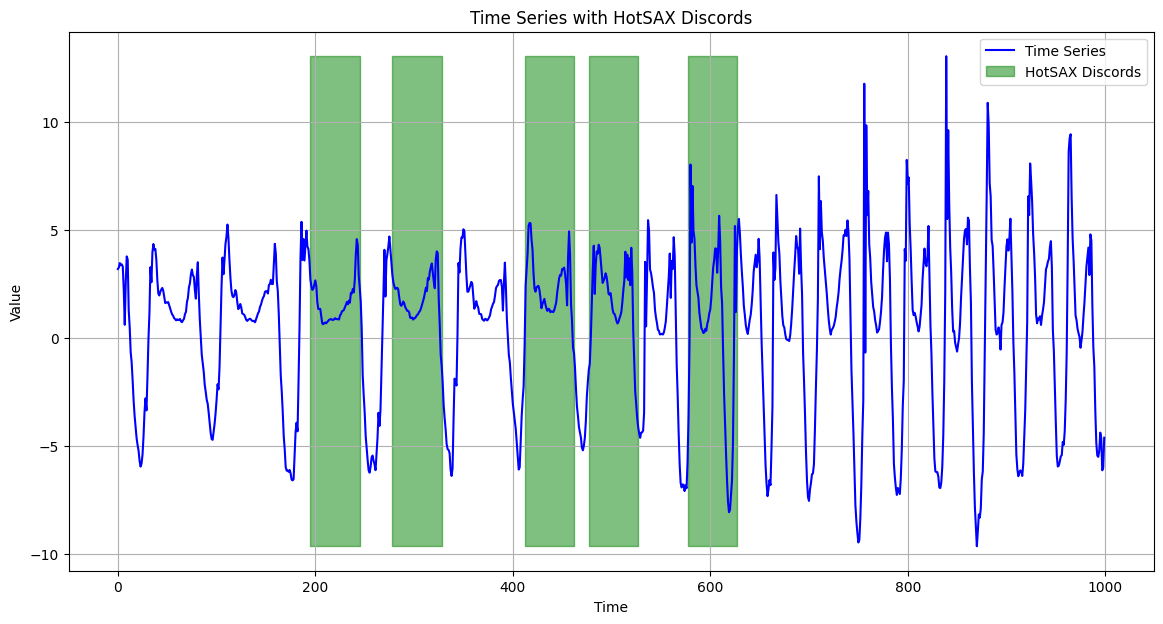

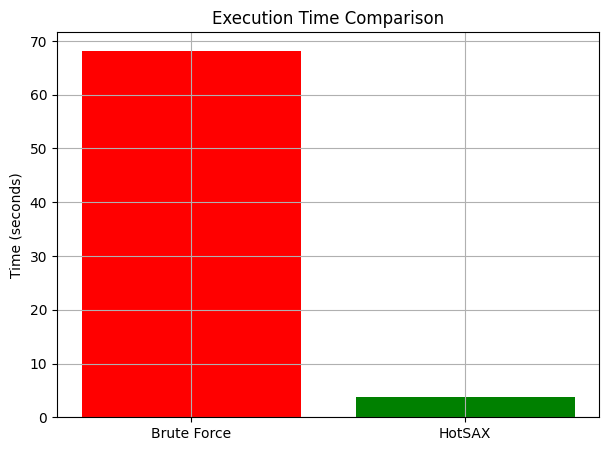

In [ ]:
visualize(data)

##### 3.1.5 Такси NY

Произведите поиск диссонансов с помощью обоих алгоритмов на наборе данных, содержащим информацию о среднем числе пассажиров в NY. Отобразите найденные диссонансы обоими алгоритмами.

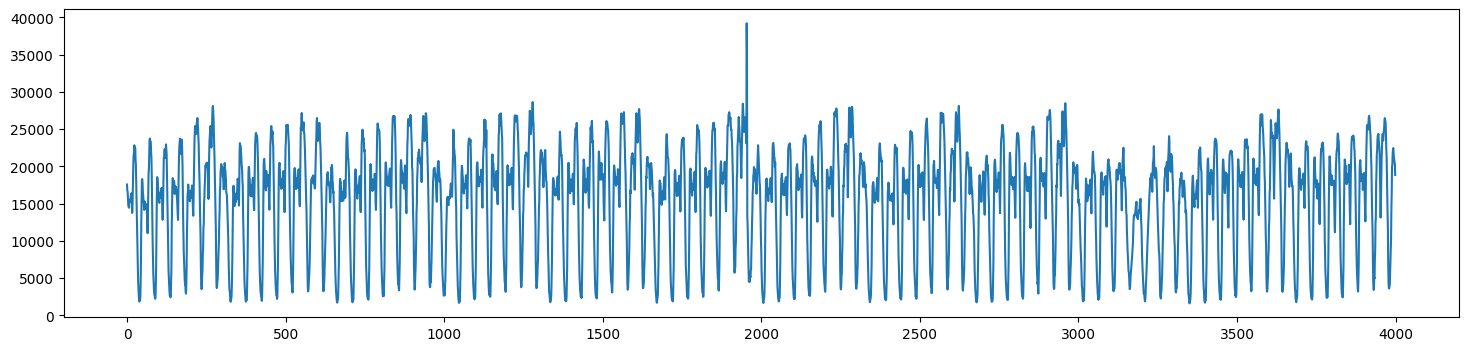

In [ ]:
nyc_taxi = pd.read_csv(dataset_dir_path/'nyc_taxi.csv',index_col=0).values[4000:8000,0].astype(np.float64)
fig = plt.figure(figsize=(18, 4))
plt.plot(nyc_taxi)

INSERT YOUR CODE

In [ ]:
result={}
times={}

start = time()
discords_brute_force= np.stack(find_discords_brute_force(nyc_taxi[:], 50, 5),dtype=float)
end = time()
times['brute_force'] = end - start
result['brute_force'] = discords_brute_force

np.int = int
start_hotsax = time()
discords_hotsax = np.stack(find_discords_hotsax(nyc_taxi[:], win_size=50, num_discords=5),dtype=float)
end_hotsax = time()
times['hotsax'] = end_hotsax - start_hotsax
result['hotsax'] = discords_hotsax

KeyboardInterrupt: 

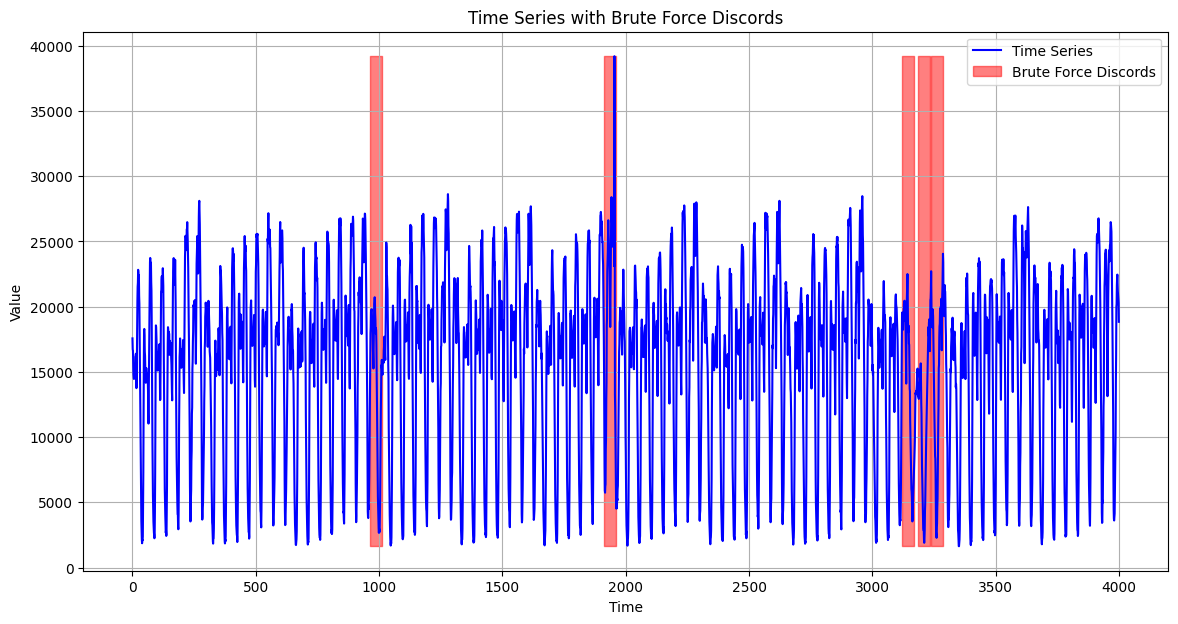

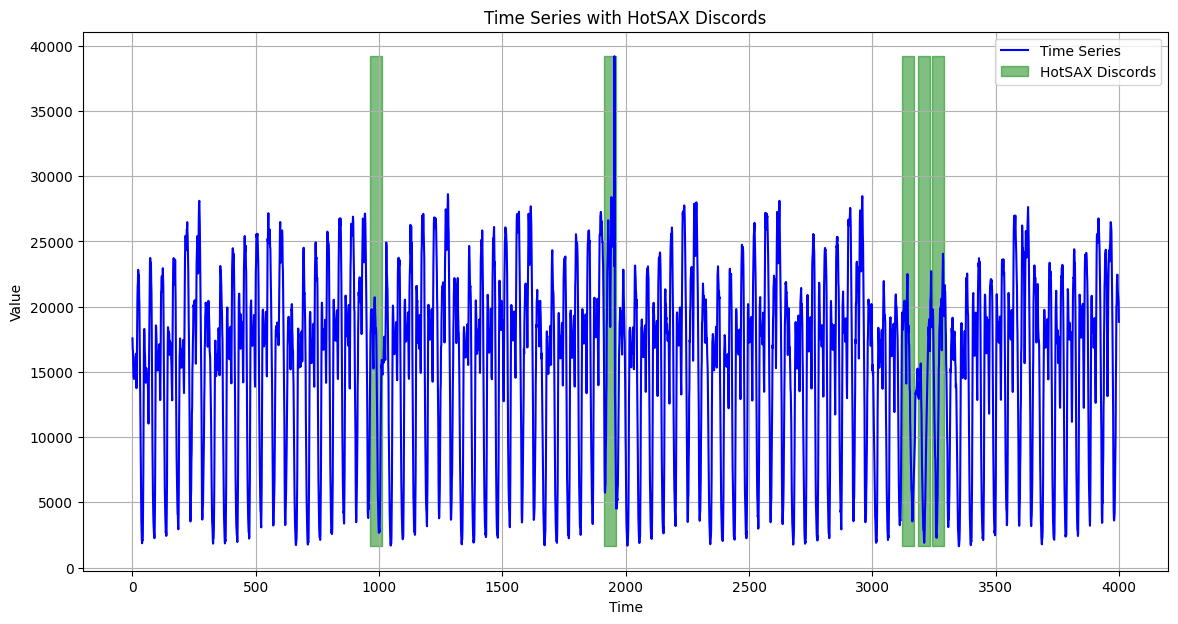

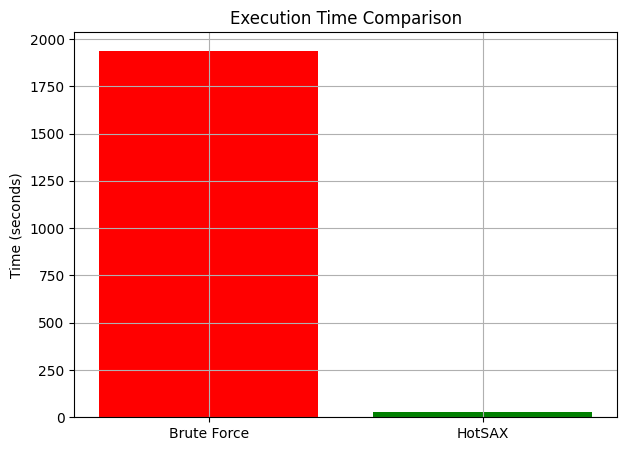

In [ ]:
visualize(nyc_taxi)

#### **3.2 Поиск диссонансов с помощью алгоритма DRAG**

In [ ]:
!pip install stumpy==1.11.1

  Obtaining dependency information for stumpy==1.11.1 from https://files.pythonhosted.org/packages/df/1b/85e852954e0453a7bc3bf45521b3f523bd5832d17e8efea09c8cf7c2cca5/stumpy-1.11.1-py3-none-any.whl.metadata
  Using cached stumpy-1.11.1-py3-none-any.whl.metadata (27 kB)
Using cached stumpy-1.11.1-py3-none-any.whl (136 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import stumpy
from stumpy import core, config
from stumpy.scrump import _prescrump


Как мы помним из лекций:

**Диапазонный диссонанс** – подпоследовательность ряда, расстояние от которой до ее ближайшего соседа не ниже заданного порога.

Основными параметрами при поисках диссонансов являются:
- $m$ - длина диссонанса
- $r$ - пороговое значение расстояния подпоследовательности ряда, до его ближайшего соседа


In [ ]:
from modules.drag import find_candidates, DRAG


Для поиска диссонансов в данной части практической работы мы воспользуемся алгоритмом **DRAG (Discord Range Aware Gathering)**.
Для начала воспользуемся данным алгоритмом, чтобы найти диссонансы в наборе данных содержащем активность человека.

In [ ]:
data = walk_run

Длину искомого диссонанса, как и для предыдущих алгоритмов, мы установим равно 50 точек.
Пороговое значение мы установим равным большим, чтобы узнать, как алгоритм отреагирует на большие значения данного параметра.

In [ ]:
m = 50
r = 10
idxs, _, _ = DRAG(data,m,r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 0


Как вы можете видеть мы установили слишком большое пороговое значение, алгоритму не удалось выделить ни одного диссонанса. Попробуем уменьшить пороговое значение до 1, чтобы улучшить результат.

In [ ]:
m = 50
r = 1
idxs, _, _ = DRAG(data, m, r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 50


При такой комбинации параметров, улучшить ситуацию не получилось. Алгоритм выделил слишком большое количество диссонансов, часть которых является ложными диссонансами и не будут информативными для нас.

Произведите подобные эксперименты с набором данных такси NY. Постройте графики демонстрирующие найденные диссонансы. Пример Графика:
![second-graph](pics/fig_ex_2.png)

In [ ]:
# INSERT YOUR CODE
data = nyc_taxi

m = 50
r = 10
idxs, _, _ = DRAG(data,m,r)
print(f'Количество найденных диссонансов: {len(idxs)}')

Количество найденных диссонансов: 0


In [ ]:
m = 50
r = 1
idxs, _, _ = DRAG(data, m, r)
print(f'Количество найденных диссонансов: {len(idxs)}')

Количество найденных диссонансов: 42


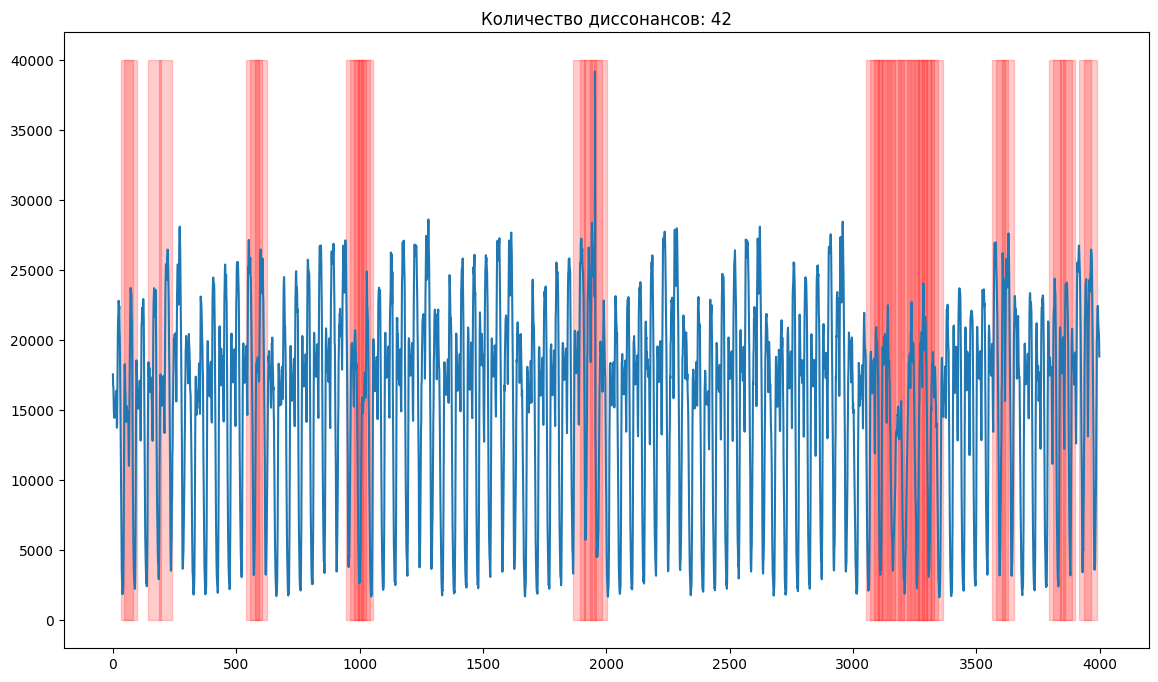

In [ ]:
def draw_discords(ax, discords, title):
    ax.set_title(title)
    ax.plot(data)

    for i, discord in enumerate(discords):
        x1 = discord
        y1 = 0
        width = 50
        height = 40000

        ax.add_patch(Rectangle((x1, y1), width, height, alpha=0.2, color='r'))

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

draw_discords(ax, idxs, 'Количество диссонансов: ' + str(len(idxs)))

Чтобы разобраться, почему так происходит и как работает данный алгоритм, ниже мы реализуем все этапы алгоритма DRAG.

Как мы помним из лекций алгоритм DRAG содержит два этапа:

1. Отбор - За одно сканирование ряда сформировать множество кандидатов в диссонансы.
2. Очистка - За одно сканирование ряда отбросить кандидатов, которые являются ложными диссонансами.

##### 3.2.1 Отбор кандидатов

Первым этапом обработки данных является отбор множества потенциальных кандидатов. Мы выбираем из всего множества подпоследовательностей ряда такие, для которых расстояние до правых ближайших соседей больше параметра $r$.

In [ ]:
#выбирем более реальное значение для порога
r = 3

In [ ]:
T, M_T, Σ_T = core.preprocess(data, m)
#формируем массив длинной равной длине  исходного ряда - m + 1,
#элемент массива является истинным,
#в том случае если подпоследовательность является потенциальным кандидатом
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
#находим индексы потенциальных кандидатов
cand_index = np.flatnonzero(is_cands)

In [ ]:
print(f'{len(cand_index)} {len(cand_index)/len(data)*100} %')

119 2.9749999999999996 %


Во время отбора кандидатов нам удалось выделить около 113 подпоследовательностей(около 11.3%), которые мы бы могли назвать потенциальными диссонансами.
Это большой процент, который не может нас устраивать как конечный результат.
Если посмотреть на рисунок ниже, мы увидим, что большая часть потенциальных диссонансов расположена в районе смены активности.
К сожалению пресутсвуют и ложные диссонансы, которые случайным образом попали в данный список.

Сформируйте график найденных диссонансов

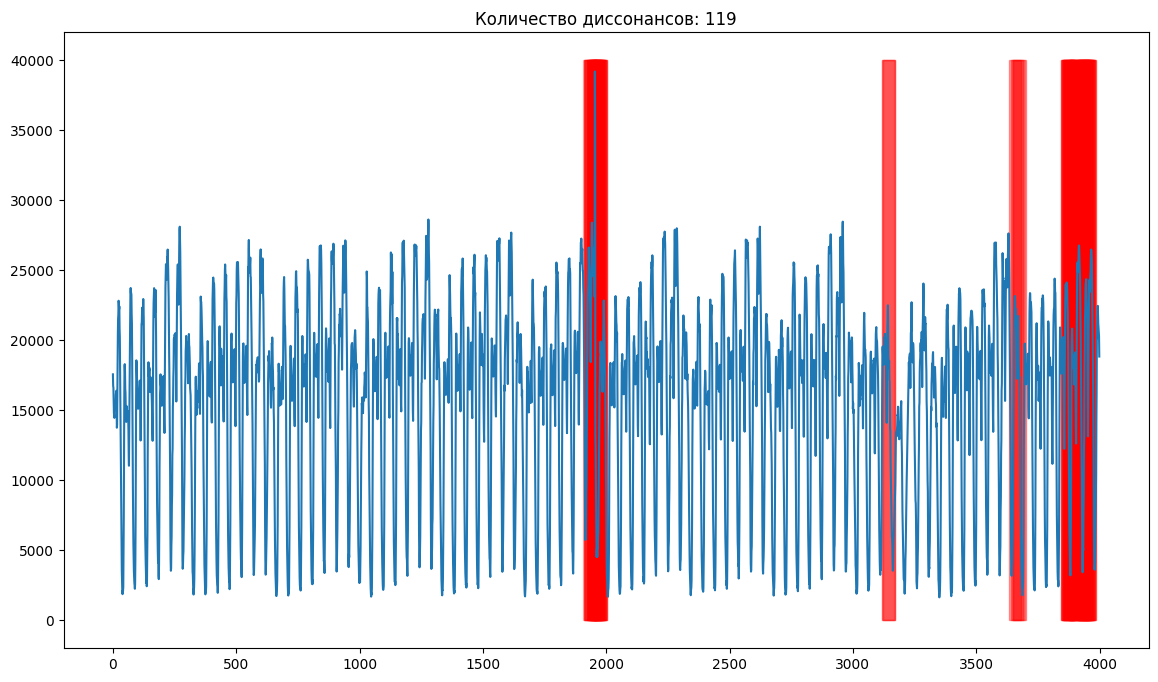

In [ ]:
# INSERT YOUR CODE
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

draw_discords(ax, cand_index, 'Количество диссонансов: ' + str(len(cand_index)))

##### 3.2.2 Очистка кандидатов
Как уже упоминалось выше, 11.3% слишком большой процент диссонансов.
Для уменьшения числа потенциальных кандидатов произведем очистку от ложных диссонансов, путем сравнения расстояния до левых ближайших соседей потенциальных диссонансов с порогом $r$.


In [ ]:
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)
cands = np.flatnonzero(is_cands)

In [ ]:
len(cands)/len(data)*100

1.15

Сформируйте график найденных диссонансов

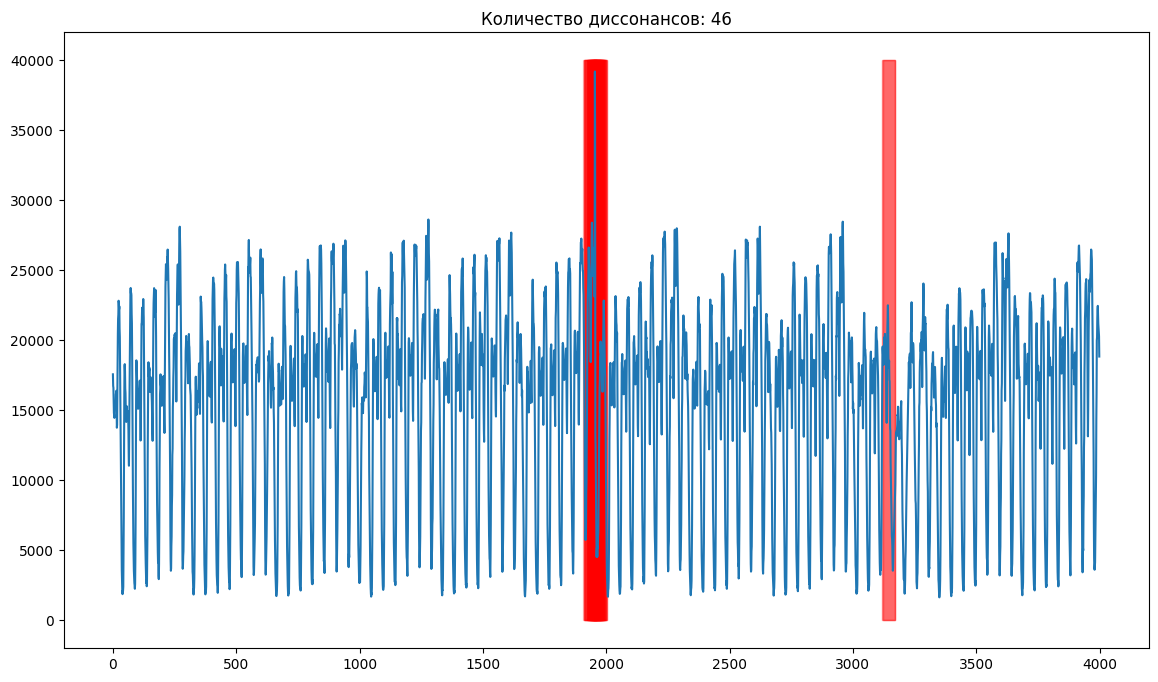

In [ ]:
# INSERT YOUR CODE
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

draw_discords(ax, cands, 'Количество диссонансов: ' + str(len(cands)))

Нам удалось сократить число диссонансов до 2.9%. Если проанализировать рисунок, то можно заметить, что большая их часть является тривиальными повторениями подпоследовательности в области смены активности. На следующем шаге избавимся от них.

In [ ]:
from modules.drag import refine_candidates
discords_idx, discords_dist, discords_nn_idx = refine_candidates(T, m, M_T, Σ_T, is_cands)
len(discords_idx)/len(data)*100

0.1

Сформируйте график найденных диссонансов

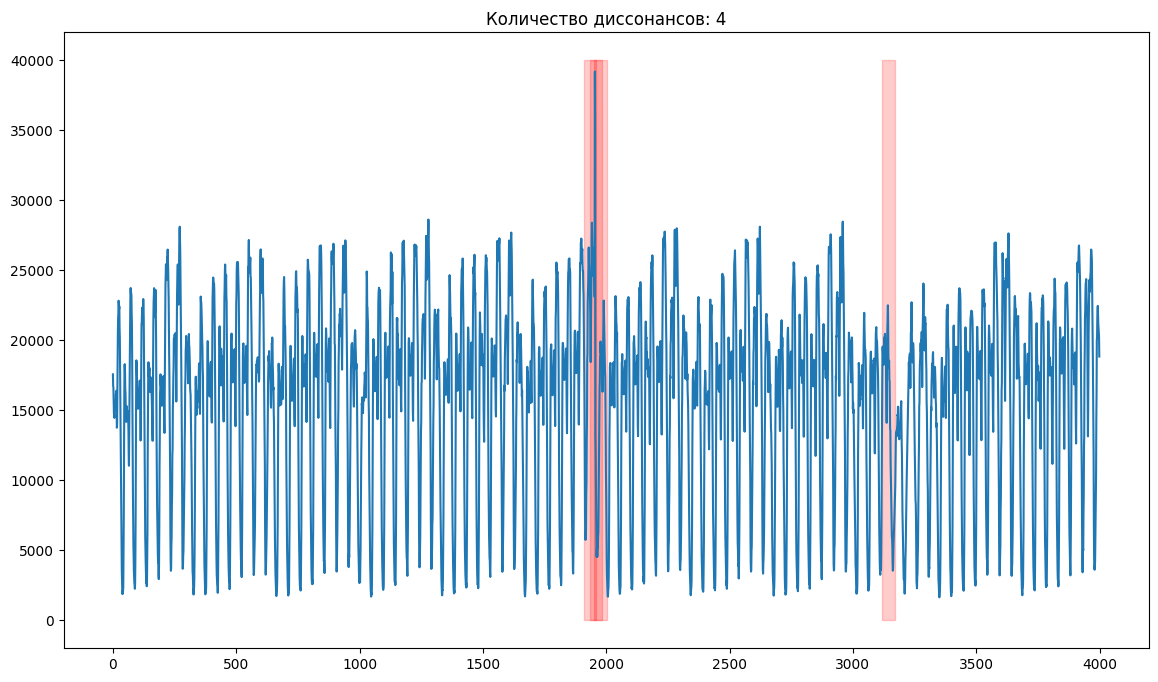

In [ ]:
# INSERT YOUR CODE
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

draw_discords(ax, discords_idx, 'Количество диссонансов: ' + str(len(discords_idx)))

##### 3.2.3 Подбор параметров

Реализуйте перебор параметров $m$ и $r$. Подберете параметры таким образом, чтобы алгоритм обнаружил только те диссонансы, которые связаны со сменой активности. Сделайте вывод о том, как эти параметры влияют на качество работы модели.
Подберите оптимальные параметры алгоритма для набора данных такси NY.
Визуализируйте результаты для разных комбинаций. Сделайте выводы.


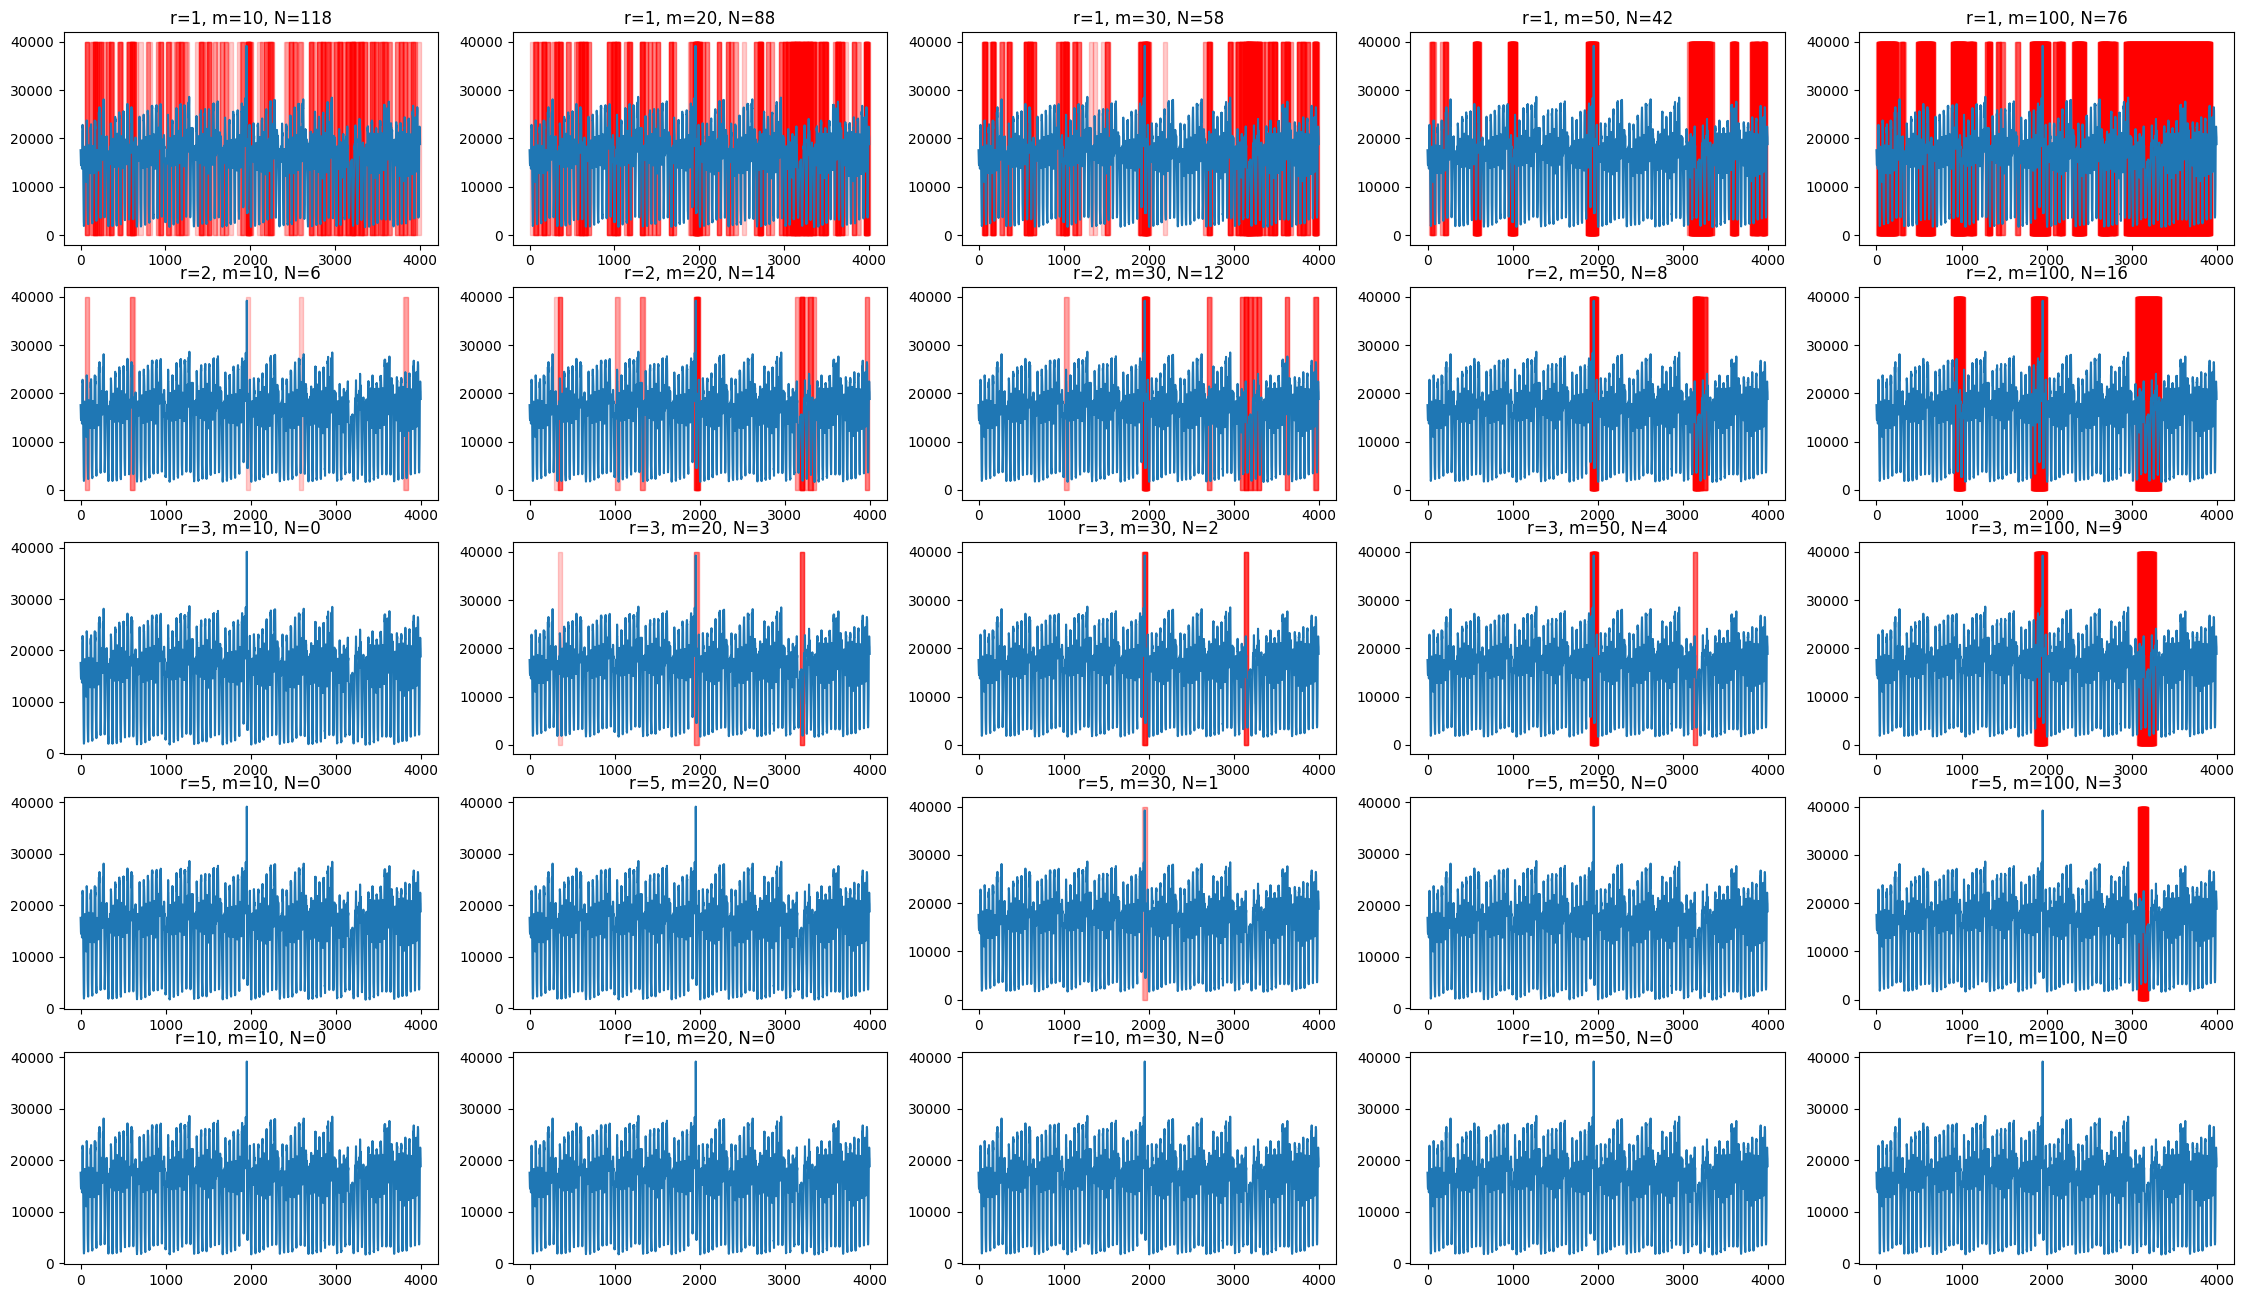

In [ ]:
# INSERT YOUR CODE
R = [1, 2, 3, 5, 10]
M = [10, 20, 30, 50, 100]

fig, axs = plt.subplots(len(R), len(M), figsize=(28, 16))

for i, r in enumerate(R):
    for j, m in enumerate(M):
        T, M_T, Σ_T = core.preprocess(data, m)
        is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
        cand_index = np.flatnonzero(is_cands)
        is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)
        cands = np.flatnonzero(is_cands)
        discords_idx, discords_dist, discords_nn_idx = refine_candidates(T, m, M_T, Σ_T, is_cands)

        draw_discords(axs[i, j], cands, f'r={r}, m={m}, N={len(discords_idx)}')